In [33]:
# import deeplake
# ds = deeplake.load('hub://activeloop/wiki-art')

import numpy as np
import matplotlib.pyplot as plt
from colorthief import ColorThief
color_thief = ColorThief('/home/mortirreke/Desktop/assets/images_2673.jpg')



In [34]:
palette1 = color_thief.get_palette(color_count=6)

In [47]:
color_thief = ColorThief('/home/mortirreke/Desktop/assets/007526.jpg')

In [48]:
palette2 = color_thief.get_palette(color_count=6)

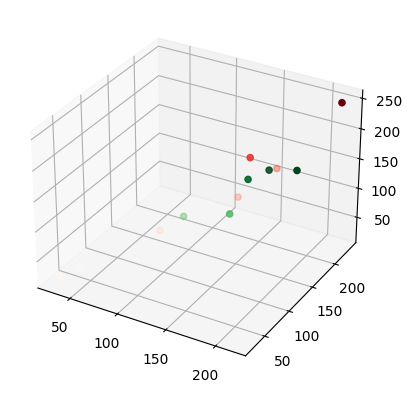

In [49]:
ax = plt.axes(projection='3d')
xdata = []
for i,x in enumerate(palette1):
    xdata.append(x[0])
ydata = []
for i,x in enumerate(palette1):
    ydata.append(x[1])
zdata = []
for i,x in enumerate(palette1):
    zdata.append(x[2])

xxdata = []
for i,x in enumerate(palette2):
    xxdata.append(x[0])
yydata = []
for i,x in enumerate(palette2):
    yydata.append(x[1])
zzdata = []
for i,x in enumerate(palette2):
    zzdata.append(x[2])

ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')
ax.scatter3D(xxdata, yydata, zzdata, c=zzdata, cmap='Reds')

In [29]:
# import the necessary packages
from scipy.spatial import distance as dist
import matplotlib.pyplot as plt
import numpy as np
import argparse
import glob
import cv2

# initialize the index dictionary to store the image name
# and corresponding histograms and the images dictionary
# to store the images themselves
index = {}
images = {}

import os

list = []
for i, image_path in enumerate(os.listdir("/home/mortirreke/Desktop/assets/")):
	if image_path.endswith(".png") or image_path.endswith(".jpg") or image_path.endswith(".jpeg"):
		if i == 4:
			break
		image = cv2.imread("/home/mortirreke/Desktop/assets/" + image_path)
		images[image_path] = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
		hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8],
			[0, 256, 0, 256, 0, 256])
		hist = cv2.normalize(hist, hist).flatten()
		index[image_path] = hist

In [30]:
print(index)

{'fornasetti_theme-variations-decorative-plate-334-woman-with-finger-on-lips.jpg': array([4.7510850e-01, 1.7813645e-02, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       2.4760279e-04, 3.1252977e-02, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000

In [31]:
# METHOD #1: UTILIZING OPENCV
# initialize OpenCV methods for histogram comparison
OPENCV_METHODS = (
	("Correlation", cv2.HISTCMP_CORREL),
	("Chi-Squared", cv2.HISTCMP_CHISQR),
	("Intersection", cv2.HISTCMP_INTERSECT),
	("Hellinger", cv2.HISTCMP_BHATTACHARYYA))
# loop over the comparison methods
for (methodName, method) in OPENCV_METHODS:
	# initialize the results dictionary and the sort
	# direction
	results = {}
	reverse = False
	# if we are using the correlation or intersection
	# method, then sort the results in reverse order
	if methodName in ("Correlation", "Intersection"):
		reverse = True

# loop over the index
for (k, hist) in index.items():
	# compute the distance between the two histograms
	# using the method and update the results dictionary
	d = cv2.compareHist(index["diego-rivera_death-of-the-capitalist-1928.jpg"], hist, method)
	results[k] = d
# sort the results
results = sorted([(v, k) for (k, v) in results.items()], reverse = reverse)

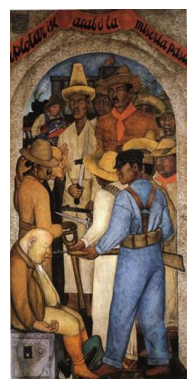

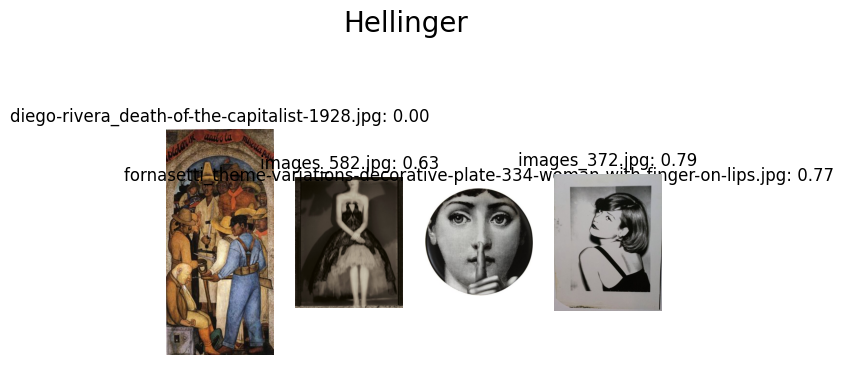

In [32]:

# show the query image
fig = plt.figure("Query")
ax = fig.add_subplot(1, 1, 1)
ax.imshow(images["diego-rivera_death-of-the-capitalist-1928.jpg"])
plt.axis("off")
# initialize the results figure
fig = plt.figure("Results: %s" % (methodName))
fig.suptitle(methodName, fontsize = 20)
# loop over the results
for (i, (v, k)) in enumerate(results):
	# show the result
	ax = fig.add_subplot(1, len(images), i + 1)
	ax.set_title("%s: %.2f" % (k, v))
	plt.imshow(images[k])
	plt.axis("off")
# show the OpenCV methods
plt.show()